## NAME : RETHINAGIRI G
## ROLL NO : 225229130
## COURSE TITLE : PRACTICAL MACHINE LEARNING LAB
## 
### LAB11. Shopping Customer Segmentation using Clustering

In [1]:
import pandas as pan
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mall=pan.read_csv('Mall_Customers.csv')


In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.shape

(200, 5)

In [5]:
mall['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mall['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

#### Step-2

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()
mall['Genre']=lb.fit_transform(mall['Genre'])


#### Step-3

In [12]:
mall.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


#### Step-4

In [13]:
mall.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [14]:
import numpy as num

num.log(mall)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.0,2.944439,2.708050,3.663562
1,0.693147,0.0,3.044522,2.708050,4.394449
2,1.098612,-inf,2.995732,2.772589,1.791759
3,1.386294,-inf,3.135494,2.772589,4.343805
4,1.609438,-inf,3.433987,2.833213,3.688879
...,...,...,...,...,...
195,5.278115,-inf,3.555348,4.787492,4.369448
196,5.283204,-inf,3.806662,4.836282,3.332205
197,5.288267,0.0,3.465736,4.836282,4.304065
198,5.293305,0.0,3.465736,4.919981,2.890372


#### Step-5

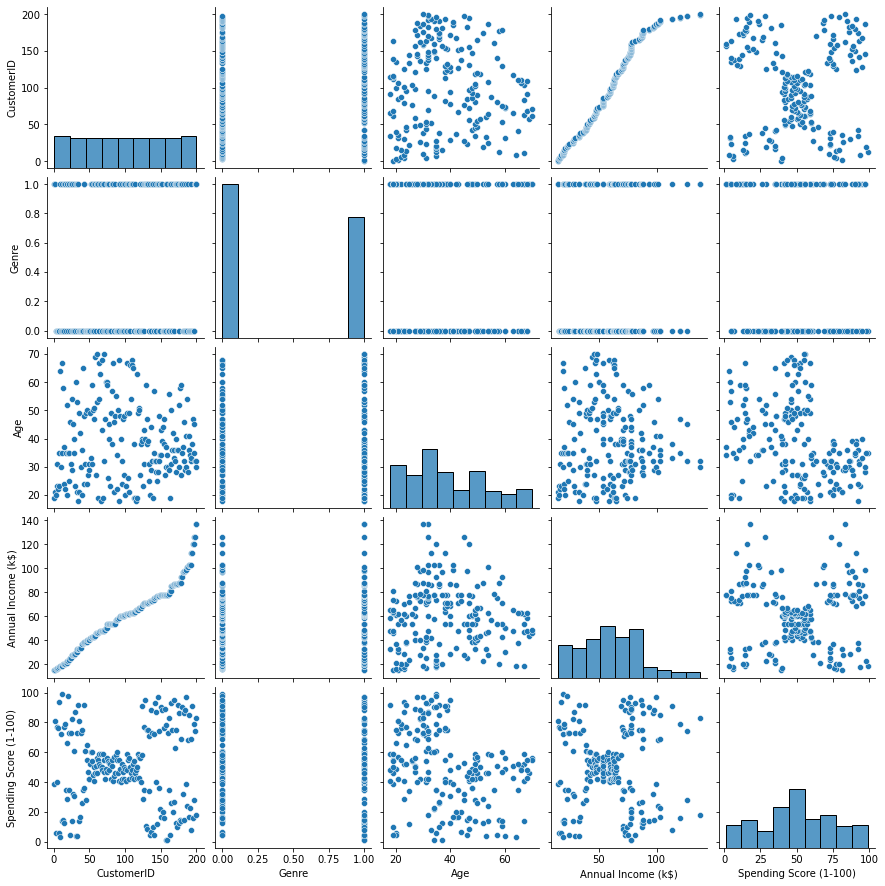

In [15]:
sns.pairplot(data=mall)

#### Step-6

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(mall)

KMeans(n_clusters=4)

In [18]:
print(kmeans.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [19]:
kmeans.cluster_centers_

array([[162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [ 92.48484848,   0.43939394,  43.87878788,  57.72727273,
         49.25757576],
       [164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 30.06779661,   0.37288136,  36.10169492,  29.86440678,
         49.86440678]])

#### Step-7

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

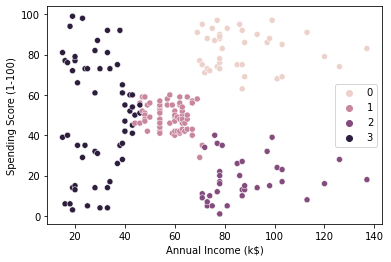

In [20]:
sns.scatterplot(data=mall,x="Annual Income (k$)",y="Spending Score (1-100)",hue=kmeans.labels_)

#### step-8

In [21]:
kmeans2=KMeans(n_clusters=5,init='k-means++')
kmeans2.fit(mall)
pred=kmeans.predict(mall)

In [22]:
frame=pan.DataFrame(mall)
frame['Cluster']=pred

In [23]:
frame

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


In [24]:
c=frame.groupby(['Cluster'])

In [25]:
C0 = frame[frame['Cluster'] == 0]
C1 = frame[frame['Cluster'] == 1]
C2 = frame[frame['Cluster'] == 2]
C3 = frame[frame['Cluster'] == 3]
C4 = frame[frame['Cluster'] == 4]

In [26]:
import statistics as ss
r=[C0,C1,C2,C3,C4]
for i in r:
    print('Average Age : ',i['Age'].mean())
    print('Average Annual Income : ',i['Annual Income (k$)'].mean())
    print('Deviation of the mean for annual Income : ',ss.stdev(i['Annual Income (k$)']))
    print('No. of Customers ie shape :' ,i.shape)
    print('From those Customers We have',i.Genre.value_counts()[1],'male and',i.Genre.value_counts()[0],'female')
    print("--------------------------------------------------------------------------------------------------------------------")

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  16.312484972924967
No. of Customers ie shape : (39, 6)
From those Customers We have 18 male and 21 female
--------------------------------------------------------------------------------------------------------------------
Average Age :  43.878787878787875
Average Annual Income :  57.72727272727273
Deviation of the mean for annual Income :  6.929414348758718
No. of Customers ie shape : (66, 6)
From those Customers We have 29 male and 37 female
--------------------------------------------------------------------------------------------------------------------
Average Age :  40.80555555555556
Average Annual Income :  87.91666666666667
Deviation of the mean for annual Income :  16.231142904922006
No. of Customers ie shape : (36, 6)
From those Customers We have 19 male and 17 female
-------------------------------------------------------------------------------------------

StatisticsError: variance requires at least two data points

#### Step-9

In [29]:
SSE=[]
for clust in range(1,20):
    km=KMeans(n_clusters=clust,init='k-means++')
    km=km.fit(mall)
    SSE.append(km.inertia_)
   

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'KMeans'

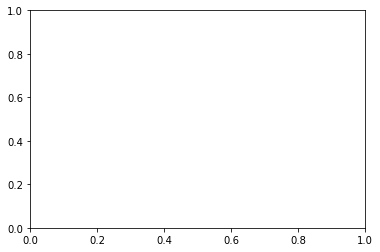

In [30]:
plt.plot(km,km.inertia_)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Inertia Value vs Number of Clusters')
plt.show()

#### Step-10

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
pca.fit(mall)
pca = pca.transform(mall)
pca = pan.DataFrame(pca,columns=['PC1','PC2'])
pca.head()

,PC1,PC2
0,-109.393522,5.478230
1,-108.210784,-34.927209
2,-107.387369,37.837242
3,-106.016046,-30.558340
4,-104.990159,7.296131


In [33]:
pca_fit=kmeans.fit(pca)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
pca_fit.cluster_centers_

array([[3.45323770e-14, 2.73558953e-15]])

In [35]:
pca_fit.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### Step-11

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

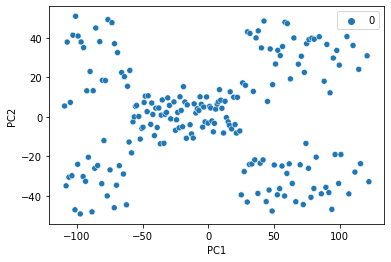

In [36]:
sns.scatterplot(data=pca,x="PC1",y='PC2',hue=pca_fit.labels_)

#### Step-12

In [37]:
from sklearn.cluster import MeanShift

In [38]:
ms = MeanShift()
ms_fit=ms.fit(pca)
ms_fit.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [39]:
print(ms_fit)

MeanShift()


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

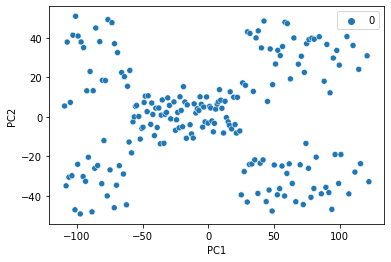

In [40]:
sns.scatterplot(data=pca,x="PC1",y='PC2',hue=ms_fit.labels_)

#### Step-13

In [41]:
from sklearn.cluster import AgglomerativeClustering as agc

In [42]:
agg=agc(n_clusters=5)
agg.fit(mall)


AgglomerativeClustering(n_clusters=5)

In [43]:
plt.figure(figsize=(10,7))
sns.clustermap(mall.linkage(agg,method='Warm'))

AttributeError: 'DataFrame' object has no attribute 'linkage'

<Figure size 720x504 with 0 Axes>

#### Step-14

In [44]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [45]:
X=mall[["Annual Income (k$)",'Spending Score (1-100)']].values
agg_clust=agc(n_clusters=5)
agg_clust.fit(X)


AgglomerativeClustering(n_clusters=5)

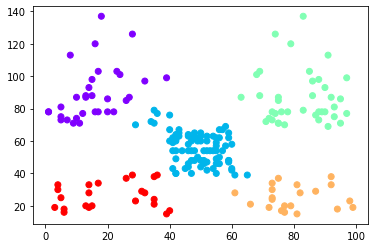

In [46]:
plt.scatter(x=X[:,1],y=X[:,0],c=agg_clust.labels_,cmap='rainbow')